# Universal Bank 고객 개인 대출 예측 분석

In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds
plt.rc(group='figure', figsize=(4, 4))

## 데이터 로드 및 기본 정보 확인

In [2]:
os.getcwd()

'c:\\Users\\pc\\Desktop\\Repo\\SeSAC\\study\\sesac_ml_dl_study_repo\\project\\code\\ml'

In [3]:
os.chdir('../../data')

In [5]:
[i for i in os.listdir() if 'csv' in i]

['APT_Data_Prep.csv',
 'APT_Detail_Seoul_2024.csv',
 'APT_Price_Seoul_Merged_2020~2024.csv',
 'APT_Price_Seoul_Split_2020.csv',
 'APT_Price_Seoul_Split_2021.csv',
 'APT_Price_Seoul_Split_2022.csv',
 'APT_Price_Seoul_Split_2023.csv',
 'APT_Price_Seoul_Split_2024.csv',
 'Marine_Product.csv',
 'UniversalBank.csv']

In [8]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,CDAccount,Mortgage,PLoan
0,1,25,1,49,4,1.6,1,No,0,No
1,2,45,19,34,3,1.5,1,No,0,No
2,3,39,15,11,1,1.0,1,No,0,No
3,4,35,9,100,1,2.7,2,No,0,No
4,5,35,8,45,4,1.0,2,No,0,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          5000 non-null   int64  
 1   Age         5000 non-null   int64  
 2   Experience  5000 non-null   int64  
 3   Income      5000 non-null   int64  
 4   Family      5000 non-null   int64  
 5   CCAvg       5000 non-null   float64
 6   Education   5000 non-null   int64  
 7   CDAccount   5000 non-null   object 
 8   Mortgage    5000 non-null   int64  
 9   PLoan       5000 non-null   object 
dtypes: float64(1), int64(7), object(2)
memory usage: 390.8+ KB


In [10]:
df.isna().sum()

ID            0
Age           0
Experience    0
Income        0
Family        0
CCAvg         0
Education     0
CDAccount     0
Mortgage      0
PLoan         0
dtype: int64

In [13]:
df.describe().round(2)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,2.40,1.94,1.88,56.50
std,1443.52,11.46,11.47,46.03,1.15,1.75,0.84,101.71
min,1.00,23.00,-3.00,8.00,1.00,0.00,1.00,0.00
25%,1250.75,35.00,10.00,39.00,1.00,0.70,1.00,0.00
50%,2500.50,45.00,20.00,64.00,2.00,1.50,2.00,0.00
75%,3750.25,55.00,30.00,98.00,3.00,2.50,3.00,101.00
max,5000.00,67.00,43.00,224.00,4.00,10.00,3.00,635.00


In [14]:
df.describe(include=object)

,CDAccount,PLoan
count,5000,5000
unique,2,2
top,No,No
freq,4698,4520


## 타겟 변수 확인 및 전처리

In [15]:
# PLoan 분포 확인
df['PLoan'].value_counts()

PLoan
No     4520
Yes     480
Name: count, dtype: int64

In [16]:
# ID 제거
df = df.drop(columns=['ID'])
df.head()

,Age,Experience,Income,Family,CCAvg,Education,CDAccount,Mortgage,PLoan
0,25,1,49,4,1.6,1,No,0,No
1,45,19,34,3,1.5,1,No,0,No
2,39,15,11,1,1.0,1,No,0,No
3,35,9,100,1,2.7,2,No,0,No
4,35,8,45,4,1.0,2,No,0,No


In [17]:
# PLoan을 0/1로 변환
df['PLoan'] = np.where(df['PLoan'] == 'Yes', 1, 0)
df['PLoan'].value_counts()

PLoan
0    4520
1     480
Name: count, dtype: int64

In [18]:
# CDAccount도 0/1로 변환
df['CDAccount'] = np.where(df['CDAccount'] == 'Yes', 1, 0)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,CDAccount,Mortgage,PLoan
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0


In [ ]:
# Experience 음수값 변환
df['Education'] = df['Education'].abs()
df[df['Education'] < 0].count()

Age           0
Experience    0
Income        0
Family        0
CCAvg         0
Education     0
CDAccount     0
Mortgage      0
PLoan         0
dtype: int64

## EDA

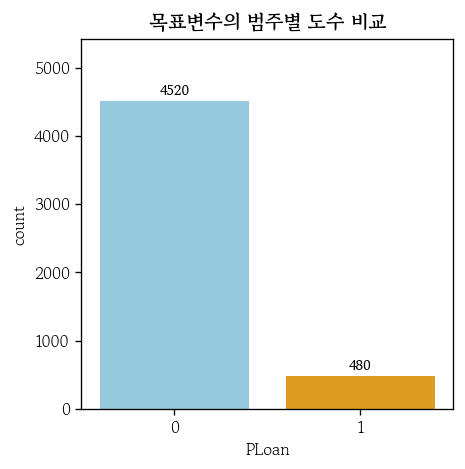

In [31]:
# 타겟 변수 분포
hds.plot.bar_freq(data=df, x='PLoan', palette=['skyblue', 'orange'])

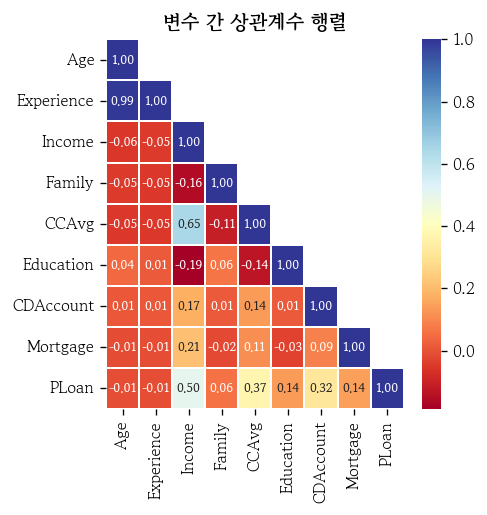

In [32]:
# 상관관계 히트맵
hds.plot.corr_heatmap(data=df, fontsize=7)

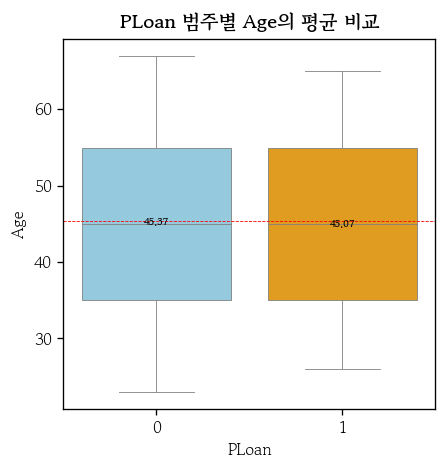

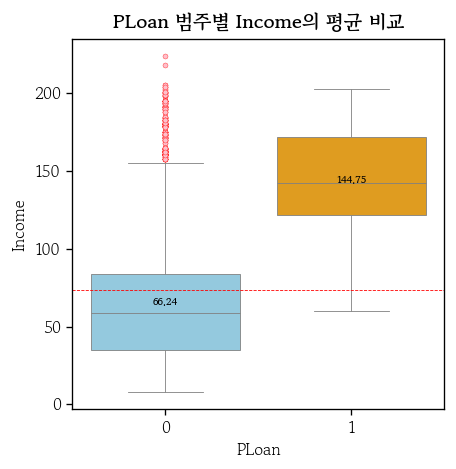

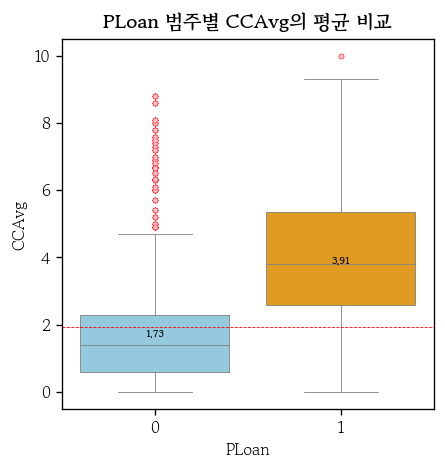

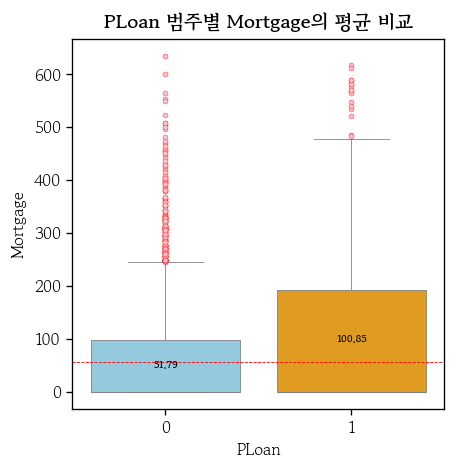

In [33]:
# 주요 변수와 타겟 관계
for var in ['Age', 'Income', 'CCAvg', 'Mortgage']:
    hds.plot.box_group(data=df, x='PLoan', y=var, palette=['skyblue', 'orange'])
    plt.show()

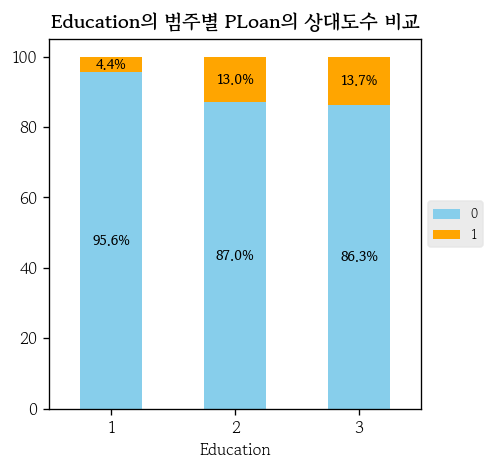

In [34]:
# Education별 PLoan 비율
hds.plot.bar_stack_prop(data=df, x='Education', g='PLoan', palette=['skyblue', 'orange'])

## 특성 행렬과 타겟 벡터 분리

In [39]:
yvar = 'PLoan'
X = df.drop(columns=yvar)
y = df[yvar].copy()

In [40]:
X.shape

(5000, 8)

In [41]:
y.value_counts(normalize=True)

PLoan
0    0.904
1    0.096
Name: proportion, dtype: float64

## 데이터 분할

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.value_counts(normalize=True).round(3))
print(y_valid.value_counts(normalize=True).round(3))

(4000, 8)
(1000, 8)
PLoan
0    0.904
1    0.096
Name: proportion, dtype: float64
PLoan
0    0.904
1    0.096
Name: proportion, dtype: float64


## 로지스틱 회귀 모델

### Solver

- Ridge : lbfgs, liblinear, saga, newton-cg, newton-cholesky, sag
- Lasso : liblinear, saga
- Elastic Net : saga

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [50]:
# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)

In [51]:
# 기본 로지스틱 회귀
model_logit = LogisticRegression(C=np.inf, max_iter=1000, random_state=0)
model_logit.fit(X_train_scaled, y_train)

print(model_logit.score(X_train_scaled, y_train))
print(model_logit.score(X_valid_scaled, y_valid))

0.9455
0.947


c:\Users\pc\anaconda3\envs\sesac_study\Lib\site-packages\sklearn\linear_model\_logistic.py:1170: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [55]:
# Ridge 로지스틱 회귀
model_ridge = LogisticRegression(l1_ratio=0, C=0.1, max_iter=1000, random_state=0, solver='lbfgs')
model_ridge.fit(X_train_scaled, y_train)

print(model_ridge.score(X_train_scaled, y_train))
print(model_ridge.score(X_valid_scaled, y_valid))

0.9475
0.95


In [56]:
# Lasso 로지스틱 회귀
model_lasso = LogisticRegression(l1_ratio=1, C=0.1, max_iter=1000, random_state=0, solver='liblinear')
model_lasso.fit(X_train_scaled, y_train)

print(model_lasso.score(X_train_scaled, y_train))
print(model_lasso.score(X_valid_scaled, y_valid))

0.9455
0.948


In [57]:
# 계수 비교
pd.DataFrame({
    'Logit': model_logit.coef_[0],
    'Ridge': model_ridge.coef_[0],
    'Lasso': model_lasso.coef_[0]
}, index=X_train.columns)

,Logit,Ridge,Lasso
Age,-0.679104,-0.013708,0.000000
Experience,0.722723,0.041462,0.000000
Income,2.446909,2.071516,2.108432
Family,0.752301,0.634183,0.601593
CCAvg,0.208648,0.241561,0.161560
Education,1.449741,1.195889,1.178651
CDAccount,0.614639,0.559477,0.539249
Mortgage,0.082698,0.085527,0.043861


### 로지스틱 회귀 모델 함수

In [66]:
def logi_model(C=np.inf, l1_ratio=None, max_iter=1000, random_state=0, solver='lbfgs'):
    logi_model = LogisticRegression(C=C, l1_ratio=l1_ratio, max_iter=max_iter, random_state=random_state, solver=solver)
    logi_model.fit(X_train_scaled, y_train)

    logi_model_train_score = logi_model.score(X_train_scaled, y_train)
    logi_model_valide_score = logi_model.score(X_valid_scaled, y_valid)

    return logi_model_train_score, logi_model_valide_score

In [ ]:
# 최적의 릿지 모델 탐색
c_value = [0.01, 0.1, 0.5, 1, 10, 100]
solver_value = ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'newton-cholesky', 'sag']
score_list = []

for i in solver_value:
    for j in c_value:
        model = logi_model(C=j, l1_ratio=0, solver=i)
        score_list.append({
            'solver': i,
            'C': j,
            'tr_score': model[0],
            'vl_score': model[1]
        })

ridge_df = pd.DataFrame(score_list)
ridge_df.sort_values('vl_score', ascending=False).head()

,solver,C,tr_score,vl_score
1,liblinear,0.1,0.94725,0.954
7,saga,0.1,0.94750,0.950
9,saga,1.0,0.94575,0.948
2,liblinear,0.5,0.94625,0.947
10,saga,10.0,0.94550,0.947


In [ ]:
# 최적의 라쏘 모델 탐색
c_value = [0.01, 0.1, 0.5, 1, 10, 100]
solver_value = ['liblinear', 'saga']
score_list = []

for i in solver_value:
    for j in c_value:
        model = logi_model(C=j, l1_ratio=1, solver=i)
        score_list.append({
            'solver': i,
            'C': j,
            'tr_score': model[0],
            'vl_score': model[1]
        })

lasso_df = pd.DataFrame(score_list)
lasso_df.sort_values('vl_score', ascending=False).head()

,solver,C,tr_score,vl_score
1,liblinear,0.1,0.94550,0.948
2,liblinear,0.5,0.94575,0.947
5,liblinear,100.0,0.94550,0.947
4,liblinear,10.0,0.94550,0.947
11,saga,100.0,0.94550,0.947


In [79]:
# 최적의 엘라스틱 넷 모델 탐색
c_value = [0.01, 0.1, 0.5, 1, 10, 100]
l1_value = np.linspace(0.1, 0.9, 10)
score_list = []

for i in l1_value:
    for j in c_value:
        model = logi_model(C=j, l1_ratio=1, solver='saga')
        score_list.append({
            'solver': i,
            'C': j,
            'tr_score': model[0],
            'vl_score': model[1]
        })

ela_df = pd.DataFrame(score_list)
ela_df.sort_values('vl_score', ascending=False).head()

,solver,C,tr_score,vl_score
1,0.100000,0.1,0.9455,0.947
2,0.100000,0.5,0.9460,0.947
5,0.100000,100.0,0.9455,0.947
4,0.100000,10.0,0.9455,0.947
11,0.188889,100.0,0.9455,0.947


In [95]:
# 최적값으로 재학습
model_ridge = LogisticRegression(l1_ratio=0, C=0.1, max_iter=1000, random_state=0, solver='liblinear')
model_lasso = LogisticRegression(l1_ratio=1, C=0.1, max_iter=1000, random_state=0, solver='liblinear')
model_ridge.fit(X_train_scaled, y_train)
model_lasso.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",1
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",0
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multicla

## 결정 트리 모델

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone

In [94]:
# 기본 결정 트리
model_tree = DecisionTreeClassifier(min_samples_split=50, random_state=0)
model_tree.fit(X_train, y_train)

print(model_tree.score(X_train, y_train))
print(model_tree.score(X_valid, y_valid))

0.9855
0.99


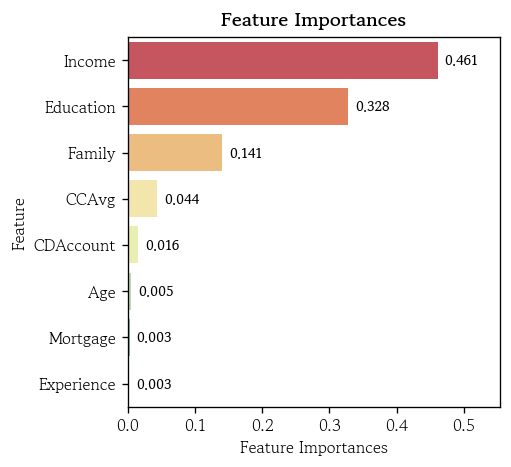

In [83]:
# 특성 중요도
hds.plot.feature_importance(model_tree)

In [86]:
# 사후 가지치기
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
path_df = pd.DataFrame(path)

def clone_tree(alpha):
    model = clone(model_tree)
    model.set_params(ccp_alpha=alpha)
    model.fit(X_train, y_train)
    return model

trees = [clone_tree(alpha) for alpha in path_df['ccp_alphas']]
path_df['vl_acc'] = [tree.score(X_valid, y_valid) for tree in trees]
path_df

,ccp_alphas,impurities,vl_acc
0,0.000000,0.020339,0.990
1,0.000018,0.020356,0.990
2,0.000165,0.020521,0.990
3,0.000214,0.020735,0.990
4,0.000364,0.021099,0.990
5,0.000372,0.021842,0.990
6,0.000388,0.022231,0.990
7,0.000485,0.022716,0.990
8,0.000584,0.023300,0.990
9,0.000822,0.024945,0.991


In [93]:
# 최적 alpha 찾기
best_idx = np.argmax(path_df['vl_acc'])
best_alpha = path_df['ccp_alphas'].iloc[best_idx]

model_tree_pruned = clone(model_tree)
model_tree_pruned.set_params(ccp_alpha=best_alpha)
model_tree_pruned.fit(X_train, y_train)

print(model_tree_pruned.score(X_train, y_train))
print(model_tree_pruned.score(X_valid, y_valid))

0.98475
0.991


## 랜덤 포레스트 모델

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=50, random_state=0)
model_rf.fit(X_train, y_train)

print(model_rf.score(X_train, y_train))
print(model_rf.score(X_valid, y_valid))

0.98675
0.989


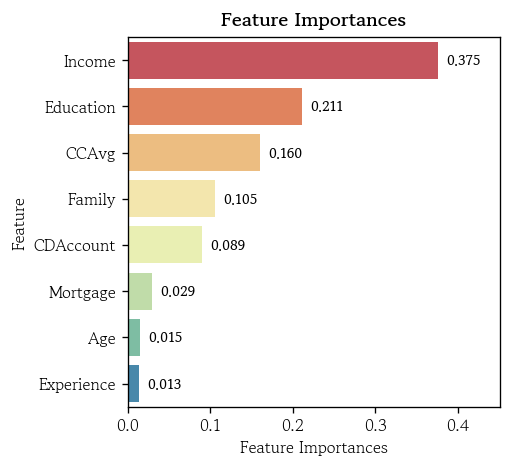

In [91]:
# 특성 중요도
hds.plot.feature_importance(model_rf)

## 모델 성능 비교

In [96]:
# 예측값 생성
y_pred_logit = model_logit.predict(X_valid_scaled)
y_pred_ridge = model_ridge.predict(X_valid_scaled)
y_pred_lasso = model_lasso.predict(X_valid_scaled)
y_pred_tree = model_tree_pruned.predict(X_valid)
y_pred_rf = model_rf.predict(X_valid)

In [97]:
print('=== Logistic Regression ===')
hds.stat.clfmetrics(y_true=y_valid, y_pred=y_pred_logit)

=== Logistic Regression ===


In [98]:
print('=== Ridge ===')
hds.stat.clfmetrics(y_true=y_valid, y_pred=y_pred_ridge)

=== Ridge ===


In [99]:
print('=== Lasso ===')
hds.stat.clfmetrics(y_true=y_valid, y_pred=y_pred_lasso)

=== Lasso ===


In [100]:
print('=== Decision Tree ===')
hds.stat.clfmetrics(y_true=y_valid, y_pred=y_pred_tree)

=== Decision Tree ===


In [101]:
print('=== Random Forest ===')
hds.stat.clfmetrics(y_true=y_valid, y_pred=y_pred_rf)

=== Random Forest ===


## ROC / PR 곡선

In [102]:
# 예측 확률 생성
y_prob_logit = model_logit.predict_proba(X_valid_scaled)
y_prob_ridge = model_ridge.predict_proba(X_valid_scaled)
y_prob_lasso = model_lasso.predict_proba(X_valid_scaled)
y_prob_tree = model_tree_pruned.predict_proba(X_valid)
y_prob_rf = model_rf.predict_proba(X_valid)

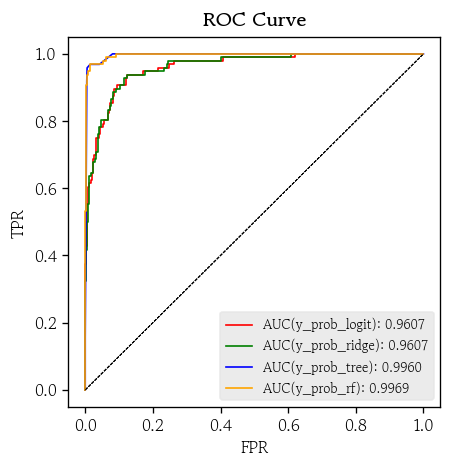

In [109]:
# ROC 곡선
hds.plot.roc_curve(y_true=y_valid, y_prob=y_prob_logit, color='red')
hds.plot.roc_curve(y_true=y_valid, y_prob=y_prob_ridge, color='green')
hds.plot.roc_curve(y_true=y_valid, y_prob=y_prob_tree, color='blue')
hds.plot.roc_curve(y_true=y_valid, y_prob=y_prob_rf, color='orange')

## 불균형 데이터 처리 (SMOTE)

In [110]:
from imblearn.over_sampling import SMOTE

In [112]:
smote = SMOTE(k_neighbors=5, random_state=0)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f'원본 데이터 : {y_train.value_counts()}')
print(f'SMOTE 후 : {y_train_bal.value_counts()}')

원본 데이터 : PLoan
0    3616
1     384
Name: count, dtype: int64
SMOTE 후 : PLoan
0    3616
1    3616
Name: count, dtype: int64


In [114]:
model_rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=50, random_state=0)
model_rf_smote.fit(X_train_bal, y_train_bal)

print(model_rf_smote.score(X_train_bal, y_train_bal))
print(model_rf_smote.score(X_valid, y_valid))

0.9769081858407079
0.956


In [115]:
y_pred_rf_smote = model_rf_smote.predict(X_valid)
hds.stat.clfmetrics(y_true=y_valid, y_pred=y_pred_rf_smote)

## 모델별 F1 스코어 확인

In [117]:
from sklearn.metrics import f1_score

# 모델 성능 요약
results = pd.DataFrame({
    'Model': ['Logit', 'Ridge', 'Lasso', 'Tree', 'RF', 'RF_SMOTE'],
    'Valid_Accuracy': [
        model_logit.score(X_valid_scaled, y_valid),
        model_ridge.score(X_valid_scaled, y_valid),
        model_lasso.score(X_valid_scaled, y_valid),
        model_tree_pruned.score(X_valid, y_valid),
        model_rf.score(X_valid, y_valid),
        model_rf_smote.score(X_valid, y_valid)
    ],
    'F1_Score': [
        f1_score(y_valid, y_pred_logit),
        f1_score(y_valid, y_pred_ridge),
        f1_score(y_valid, y_pred_lasso),
        f1_score(y_valid, y_pred_tree),
        f1_score(y_valid, y_pred_rf),
        f1_score(y_valid, y_pred_rf_smote)
    ]
})
results.sort_values('F1_Score', ascending=False)

,Model,Valid_Accuracy,F1_Score
3,Tree,0.991,0.953368
4,RF,0.989,0.941799
5,RF_SMOTE,0.956,0.808696
1,Ridge,0.954,0.726190
0,Logit,0.947,0.693642
2,Lasso,0.948,0.690476
